In [1]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [4]:
# the dataset used contains all delays under 30 mins. 
df = pd.read_csv("../Data/ttc_subway_delay_2018_2019_for_machine_learning.csv", encoding='unicode_escape')

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
df.head()

,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
0,7720,2018-02-13,6:57,Tuesday,BROADVIEW STATION,EUNT,2,4,W,BD,5285,Equipment - No Trouble Found,43.4037,-79.2130,Bloor Danforth,February,5-9AM,2,6,2018
1,3147,2019-06-12,11:54,Wednesday,COXWELL STATION,TUNIP,2,5,W,BD,5350,Operator Not In Position,43.4103,-79.1923,Bloor Danforth,June,9AM-12PM,6,11,2019
2,11036,2018-07-31,17:05,Tuesday,COXWELL STATION,TUNOA,2,4,E,BD,0,No Operator Immediately Available,43.4103,-79.1923,Bloor Danforth,July,3-6PM,7,17,2018
3,11037,2018-07-31,17:33,Tuesday,COXWELL STATION,TUNOA,2,4,E,BD,0,No Operator Immediately Available,43.4103,-79.1923,Bloor Danforth,July,3-6PM,7,17,2018
4,11038,2018-07-31,17:40,Tuesday,COXWELL STATION,TUNOA,2,4,W,BD,0,No Operator Immediately Available,43.4103,-79.1923,Bloor Danforth,July,3-6PM,7,17,2018


In [5]:
df['datetime'] = pd.to_datetime(df['date'].str.cat(df['time'],sep=" "))
df.head()

,id,date,time,day,station,code,min_delay,min_gap,bound,line,...,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year,datetime
0,7720,2018-02-13,6:57,Tuesday,BROADVIEW STATION,EUNT,2,4,W,BD,...,Equipment - No Trouble Found,43.4037,-79.2130,Bloor Danforth,February,5-9AM,2,6,2018,2018-02-13 06:57:00
1,3147,2019-06-12,11:54,Wednesday,COXWELL STATION,TUNIP,2,5,W,BD,...,Operator Not In Position,43.4103,-79.1923,Bloor Danforth,June,9AM-12PM,6,11,2019,2019-06-12 11:54:00
2,11036,2018-07-31,17:05,Tuesday,COXWELL STATION,TUNOA,2,4,E,BD,...,No Operator Immediately Available,43.4103,-79.1923,Bloor Danforth,July,3-6PM,7,17,2018,2018-07-31 17:05:00
3,11037,2018-07-31,17:33,Tuesday,COXWELL STATION,TUNOA,2,4,E,BD,...,No Operator Immediately Available,43.4103,-79.1923,Bloor Danforth,July,3-6PM,7,17,2018,2018-07-31 17:33:00
4,11038,2018-07-31,17:40,Tuesday,COXWELL STATION,TUNOA,2,4,W,BD,...,No Operator Immediately Available,43.4103,-79.1923,Bloor Danforth,July,3-6PM,7,17,2018,2018-07-31 17:40:00


In [6]:
df = df.loc[df["station"]=="SHEPPARD WEST STATION"]
df.head()

,id,date,time,day,station,code,min_delay,min_gap,bound,line,...,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year,datetime
3117,83,2019-01-05,14:39,Saturday,SHEPPARD WEST STATION,TUNIP,3,6,N,YU,...,Operator Not In Position,43.7497,-79.4619,Yonge University Spadina,January,12-3PM,1,14,2019,2019-01-05 14:39:00
3118,101,2019-01-07,11:51,Monday,SHEPPARD WEST STATION,TUNIP,3,6,N,YU,...,Operator Not In Position,43.7497,-79.4619,Yonge University Spadina,January,9AM-12PM,1,11,2019,2019-01-07 11:51:00
3119,106,2019-01-07,16:42,Monday,SHEPPARD WEST STATION,MUI,3,5,S,YU,...,Injured or ill Customer (On Train) - Transported,43.7497,-79.4619,Yonge University Spadina,January,3-6PM,1,16,2019,2019-01-07 16:42:00
3120,181,2019-01-11,12:28,Friday,SHEPPARD WEST STATION,EUNT,3,6,S,YU,...,Equipment - No Trouble Found,43.7497,-79.4619,Yonge University Spadina,January,12-3PM,1,12,2019,2019-01-11 12:28:00
3121,314,2019-01-18,16:44,Friday,SHEPPARD WEST STATION,TUNIP,3,5,S,YU,...,Operator Not In Position,43.7497,-79.4619,Yonge University Spadina,January,3-6PM,1,16,2019,2019-01-18 16:44:00


In [7]:
df_sheppardwest = df[["datetime","min_delay"]]
df_sheppardwest = df_sheppardwest.set_index("datetime")
df_sheppardwest.head()

,min_delay
datetime,
2019-01-05 14:39:00,3
2019-01-07 11:51:00,3
2019-01-07 16:42:00,3
2019-01-11 12:28:00,3
2019-01-18 16:44:00,3


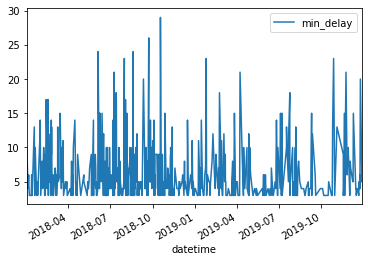

In [8]:
df_sheppardwest.plot()

# Select your features (columns)

In [9]:
# Keep select columns
df = df.drop(['id','date','time','min_gap','line','vehicle','code_info','line_name','month_number','time_range',"latitude","longitude","year"], axis=1)
# df = df.drop(['id','date','time','code','min_gap','vehicle','code_info','line_name','month_number','hour',"latitude","longitude","year"], axis=1)
df.head()

,day,station,code,min_delay,bound,month,hour,datetime
3117,Saturday,SHEPPARD WEST STATION,TUNIP,3,N,January,14,2019-01-05 14:39:00
3118,Monday,SHEPPARD WEST STATION,TUNIP,3,N,January,11,2019-01-07 11:51:00
3119,Monday,SHEPPARD WEST STATION,MUI,3,S,January,16,2019-01-07 16:42:00
3120,Friday,SHEPPARD WEST STATION,EUNT,3,S,January,12,2019-01-11 12:28:00
3121,Friday,SHEPPARD WEST STATION,TUNIP,3,S,January,16,2019-01-18 16:44:00


In [10]:
# Label encoding for categorical variables
# df["day_number"] = df["day"].astype("category").cat.codes
# # df["station_number"] = df["station"].astype("category").cat.codes
# df["bound_number"] = df["bound"].astype("category").cat.codes
# df["line_number"] = df["line"].astype("category").cat.codes
df["hour_cat"] = df["hour"].astype("category")
df["year_cat"] = df["year"].astype("category")
df.head()

,day,station,code,min_delay,bound,month,hour,datetime,hour_cat
3117,Saturday,SHEPPARD WEST STATION,TUNIP,3,N,January,14,2019-01-05 14:39:00,14
3118,Monday,SHEPPARD WEST STATION,TUNIP,3,N,January,11,2019-01-07 11:51:00,11
3119,Monday,SHEPPARD WEST STATION,MUI,3,S,January,16,2019-01-07 16:42:00,16
3120,Friday,SHEPPARD WEST STATION,EUNT,3,S,January,12,2019-01-11 12:28:00,12
3121,Friday,SHEPPARD WEST STATION,TUNIP,3,S,January,16,2019-01-18 16:44:00,16


In [11]:
# Only keep numerical columns
# df = df.drop(["day","station","bound"], axis=1)
df = df.drop(["station","datetime","hour"], axis=1)
df.head()

,day,code,min_delay,bound,month,hour_cat
3117,Saturday,TUNIP,3,N,January,14
3118,Monday,TUNIP,3,N,January,11
3119,Monday,MUI,3,S,January,16
3120,Friday,EUNT,3,S,January,12
3121,Friday,TUNIP,3,S,January,16


In [12]:
# Plot correlation matrix
df.corr()

,min_delay
min_delay,1.0


# Select X and y

In [13]:
# X = df.drop("min_delay", axis=1)
X = pd.get_dummies(df.loc[:,df.columns!='min_delay'])
y = df["min_delay"]

In [14]:
X.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,code_EUAC,code_EUATC,code_EUBK,...,hour_cat_14,hour_cat_15,hour_cat_16,hour_cat_17,hour_cat_18,hour_cat_19,hour_cat_20,hour_cat_21,hour_cat_22,hour_cat_23
3117,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3118,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3119,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3120,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3121,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
y.head()

3117    3
3118    3
3119    3
3120    3
3121    3
Name: min_delay, dtype: int64

# Create a Train Test Split



In [16]:
from sklearn.model_selection import train_test_split
print(X.shape, y.shape)

(649, 108) (649,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [18]:
X_train.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,code_EUAC,code_EUATC,code_EUBK,...,hour_cat_14,hour_cat_15,hour_cat_16,hour_cat_17,hour_cat_18,hour_cat_19,hour_cat_20,hour_cat_21,hour_cat_22,hour_cat_23
11509,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3295,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6423,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3270,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3192,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_train.head()

11509    8
3295     3
6423     4
3270     3
3192     3
Name: min_delay, dtype: int64

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [20]:
# Scale data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [21]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Print the model score
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.35803762947279183
Testing Data Score: -4.759575455191963e+20


# Make Predictions

In [24]:
# Make predictions with the model
predictions = model.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
13271,4.513184,18
6383,9.248535,4
12668,6.471191,12
10223,5.688965,6
3189,3.846191,3
...,...,...
11891,9.816895,9
10977,8.592773,7
12665,6.548340,12
3145,3.174805,3


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [25]:
# Create the GridSearchCV model
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [1, 5, 10],
#               'gamma': [0.0001, 0.0005, 0.001]}
# grid = GridSearchCV(model2, param_grid, verbose=3)

In [26]:
# Train the model with GridSearch
# grid.fit(X_train_scaled, y_train)

In [27]:
# print(grid.best_params_)
# print(grid.best_score_)

# Save the Model

In [28]:
# using results above to save the best model
# best_model=SVC(kernel='linear', C=10, gamma=0.0001)

# import joblib

# filename = 'best_model.sav'
# joblib.dump(best_model, filename)